In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

cwd = os.getcwd()
#print(cwd)

In [3]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [4]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [5]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [6]:
se_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
5,"Washington, DC",VA,323667.0,320000.0,325000.0,340000.0,358333.0,374439.0,380949.0,379282.0,...,486417.0,478083.0,472250.0,460417.0,462083.0,475667.0,502733.0,526067.0,543317.0,546667.0
7,"Miami, FL",FL,163333.0,161667.0,162333.0,169333.0,178000.0,187667.0,195000.0,199667.0,...,413333.0,411667.0,408333.0,408667.0,413667.0,425333.0,436333.0,445800.0,455800.0,458800.0
8,"Atlanta, GA",GA,141918.0,145000.0,150500.0,161833.0,173500.0,180833.0,187467.0,185433.0,...,361833.0,355167.0,351167.0,344333.0,343933.0,347600.0,358267.0,367000.0,377333.0,383333.0
17,"Tampa, FL",FL,123300.0,122567.0,124933.0,128267.0,133967.0,138300.0,144967.0,147333.0,...,364967.0,358633.0,356667.0,349967.0,351633.0,354933.0,361633.0,366633.0,371667.0,375000.0
19,"Baltimore, MD",MD,233333.0,228333.0,228333.0,236633.0,248267.0,259583.0,267950.0,269650.0,...,346667.0,337000.0,329333.0,326000.0,327500.0,333193.0,344860.0,360027.0,373667.0,380333.0


In [8]:
se_df_states = se_df.drop(columns=['RegionName'])
se_df_states = se_df_states.groupby('StateName').mean()
#se_df_states.to_csv("test.csv")
se_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AL,139207.500000,136455.100000,137450.100000,143137.200000,150824.200000,152920.500000,156008.100000,154458.000000,165501.800000,162088.400000,...,224562.600000,222363.800000,218702.900000,215585.400000,215292.600000,219752.500000,225936.700000,231743.300000,236065.000000,241476.700000
DE,192583.000000,187791.500000,184000.000000,185417.000000,188042.000000,192000.000000,197316.500000,199983.500000,200150.000000,197166.500000,...,334158.000000,334975.000000,324057.500000,318232.500000,314657.500000,324241.500000,330075.000000,337000.000000,344666.500000,350000.000000
FL,143926.375000,143197.958333,144762.375000,149572.916667,154843.000000,158203.500000,161218.708333,162953.500000,161465.958333,158509.791667,...,361974.666667,357936.916667,355561.833333,352913.958333,354338.083333,361233.833333,369302.083333,375599.166667,379442.916667,378775.166667
GA,120113.921053,120248.710526,120517.526316,124408.473684,129694.052632,133183.789474,135620.157895,134536.631579,130250.000000,125513.578947,...,252825.473684,247868.631579,242789.684211,238836.578947,240902.947368,243682.000000,250256.473684,259117.000000,269618.578947,277058.684211
KY,106003.888889,104156.111111,116513.333333,118824.444444,122107.222222,125122.222222,126068.666667,126081.444444,123689.888889,122463.777778,...,221441.444444,220998.777778,217359.222222,213927.888889,213627.666667,214242.555556,221240.111111,226382.111111,233144.444444,237605.777778
LA,145816.714286,139870.142857,142193.714286,143148.571429,147288.000000,149526.142857,151309.428571,153123.857143,151133.428571,147880.857143,...,215740.571429,211607.000000,209607.285714,207254.714286,205730.857143,211685.714286,215847.571429,221133.285714,222870.000000,224874.714286
MD,188532.600000,184671.600000,196353.000000,200478.000000,207381.600000,206896.600000,217908.400000,216638.400000,216993.200000,208033.400000,...,315280.000000,312840.200000,305429.800000,297746.400000,299033.200000,300711.800000,302575.200000,315362.200000,327793.600000,339983.200000
MS,111958.500000,111950.000000,112416.500000,119500.000000,122344.500000,126361.000000,127811.000000,129666.500000,128666.500000,123658.500000,...,223850.000000,221283.500000,215650.000000,208325.000000,208558.000000,211075.000000,221450.000000,227200.000000,235442.000000,235420.500000
NC,149484.241379,145079.689655,144148.965517,141901.000000,145413.310345,149695.551724,153056.000000,154332.551724,151579.965517,148124.517241,...,296492.724138,295243.620690,288494.275862,283490.172414,277736.724138,280135.586207,287852.310345,301618.379310,311578.758621,316812.931034


In [9]:
# Function to convert date columns to written form
def convert_to_month_name(col_name):
    month_num = int(col_name.split('/')[0])
    return calendar.month_name[month_num]

In [10]:
# Rename the columns to match the desired format
se_df_states_typedmonths = se_df_states.rename(columns=convert_to_month_name)
se_df_states_typedmonths.head()

,January,February,March,April,May,June,July,August,September,October,...,October,November,December,January,February,March,April,May,June,July
StateName,,,,,,,,,,,,,,,,,,,,,
AL,139207.500000,136455.100000,137450.100000,143137.200000,150824.200000,152920.500000,156008.100000,154458.000000,165501.800000,162088.400000,...,224562.600000,222363.800000,218702.900000,215585.400000,215292.600000,219752.500000,225936.700000,231743.300000,236065.000000,241476.700000
DE,192583.000000,187791.500000,184000.000000,185417.000000,188042.000000,192000.000000,197316.500000,199983.500000,200150.000000,197166.500000,...,334158.000000,334975.000000,324057.500000,318232.500000,314657.500000,324241.500000,330075.000000,337000.000000,344666.500000,350000.000000
FL,143926.375000,143197.958333,144762.375000,149572.916667,154843.000000,158203.500000,161218.708333,162953.500000,161465.958333,158509.791667,...,361974.666667,357936.916667,355561.833333,352913.958333,354338.083333,361233.833333,369302.083333,375599.166667,379442.916667,378775.166667
GA,120113.921053,120248.710526,120517.526316,124408.473684,129694.052632,133183.789474,135620.157895,134536.631579,130250.000000,125513.578947,...,252825.473684,247868.631579,242789.684211,238836.578947,240902.947368,243682.000000,250256.473684,259117.000000,269618.578947,277058.684211
KY,106003.888889,104156.111111,116513.333333,118824.444444,122107.222222,125122.222222,126068.666667,126081.444444,123689.888889,122463.777778,...,221441.444444,220998.777778,217359.222222,213927.888889,213627.666667,214242.555556,221240.111111,226382.111111,233144.444444,237605.777778


In [11]:
# Combining the columns by month
se_df_combined_by_state = pd.DataFrame({
    "January": se_df_states_typedmonths[["January"]].mean(axis=1),
    "February": se_df_states_typedmonths[["February"]].mean(axis=1),
    "March": se_df_states_typedmonths[["March"]].mean(axis=1),
    "April": se_df_states_typedmonths[["April"]].mean(axis=1),
    "May": se_df_states_typedmonths[["May"]].mean(axis=1),
    "June": se_df_states_typedmonths[["June"]].mean(axis=1),
    "July": se_df_states_typedmonths[["July"]].mean(axis=1),
    "August": se_df_states_typedmonths[["August"]].mean(axis=1),
    "September": se_df_states_typedmonths[["September"]].mean(axis=1),
    "October": se_df_states_typedmonths[["October"]].mean(axis=1),
    "November": se_df_states_typedmonths[["November"]].mean(axis=1),
    "December": se_df_states_typedmonths[["December"]].mean(axis=1)  
})

se_df_combined_by_state.head()

,January,February,March,April,May,June,July,August,September,October,November,December
StateName,,,,,,,,,,,,
AL,164302.909091,163349.781818,164725.009091,168296.954545,173379.254545,176773.200000,179064.390909,172027.830000,171420.380000,169035.120000,167803.115000,167011.575000
DE,232547.409091,230660.181818,232691.909091,237205.727273,242007.954545,246832.090909,249780.318182,241495.300000,243007.500000,242978.150000,242751.300000,239181.050000
FL,225252.806818,226894.636364,230016.893939,234239.310606,239229.784091,243105.393939,245236.912879,232308.583333,231247.670833,230644.725000,230749.237500,231992.916667
GA,163507.375598,163903.141148,165752.229665,170136.354067,175531.746411,180457.784689,183830.832536,174807.094737,172866.431579,170738.589474,169276.747368,168942.642105
KY,149842.979798,148594.636364,150801.161616,154167.626263,158637.080808,163359.787879,166681.959596,161202.366667,160011.511111,158901.377778,157557.977778,156266.788889


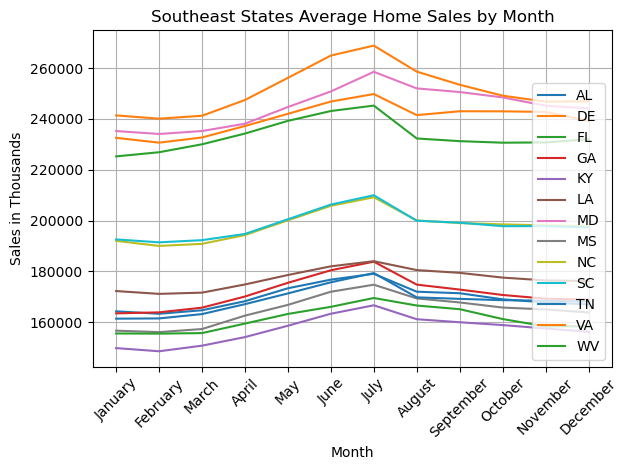

In [15]:
# Transpose rotates to graph data by states (instead of months)
df_transposed = se_df_combined_by_state.transpose()

for state in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[state], label=state)

plt.title("Southeast States Average Home Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales in Thousands")
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/Months and Seasonality/Southeast/SE Avg by month.png")
plt.show()

In [16]:
df_seasons = df_transposed
df_seasons["Seasons"] = ["Winter","Winter", "Spring", "Spring", "Spring","Summer", "Summer","Summer", "Autumn","Autumn","Autumn","Winter"]
#df_seasons.reset_index()
df_seasons_grouped = df_seasons.groupby("Seasons").mean()
df_seasons_grouped = df_seasons_grouped.rename_axis('Seasons')
df_seasons_grouped 

StateName,AL,DE,FL,GA,KY,LA,MD,MS,NC,SC,TN,VA,WV
Seasons,,,,,,,,,,,,,
Autumn,169419.538333,242912.316667,230880.544444,170960.589474,158823.622222,177826.652381,248071.666667,166210.950000,198551.890805,198265.945455,168793.600000,249788.033333,161598.300000
Spring,168800.406061,237301.863636,234495.329545,170473.443381,154535.289562,175043.376623,239343.393939,162266.393939,195090.375131,195856.493113,167236.127946,248274.064394,159504.106061
Summer,175955.140303,246035.903030,240216.963384,179698.570654,163748.038047,182190.477056,253773.908485,172056.662121,205016.560188,205405.032507,174958.737037,264121.397727,167405.009091
Winter,164888.088636,234129.546970,228046.786616,165451.052951,151568.135017,173225.655411,237812.427879,158899.631818,193281.329676,193771.506887,163675.130471,242792.179167,156525.821212


In [17]:
se_df_seasons = pd.DataFrame({
    "Avg by Season": df_seasons_grouped.mean(axis=1)})
se_df_seasons

,Avg by Season
Seasons,
Autumn,195546.434598
Spring,192940.051026
Summer,202352.492279
Winter,189543.637901


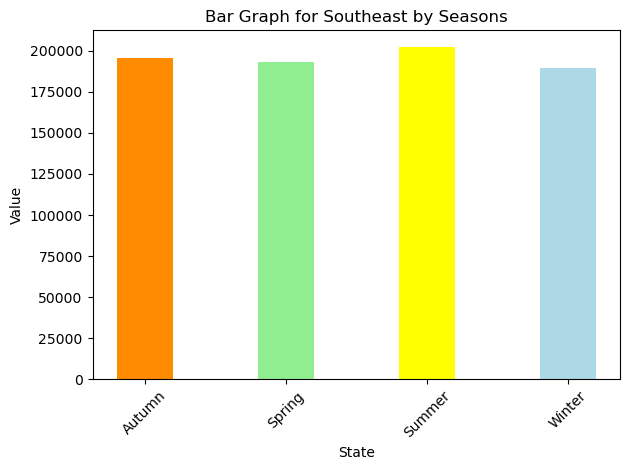

In [25]:
# Transpose the DataFrame for easier plotting
transpose_for_plotting = se_df_seasons.transpose()


# Define color mapping for each season
color_map = {
    'Autumn': 'darkorange',
    'Spring': 'lightgreen',
    'Summer': 'yellow',
    'Winter': 'lightblue'
}

# Create four bar graphs by season
#plt.figure(figsize=(7, 3))
for season in transpose_for_plotting.columns:
    plt.bar(season, transpose_for_plotting[season], color=color_map[season], label=season, width=0.4)

plt.title("Bar Graph for Southeast by Seasons")
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.legend()
plt.savefig("Images/Months and Seasonality/Southeast/SE Avg by Seasons.png")
plt.show()
